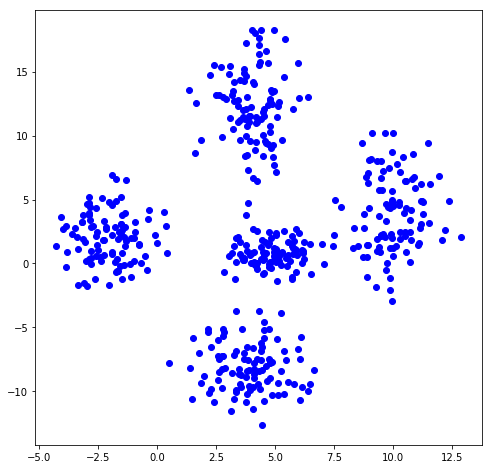

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

df = pd.read_csv('hw3_data.csv', header=0)
plt.figure(figsize=(8,8))
x = df.iloc[0:500:,0]
y = df.iloc[0:500:,1]

plt.scatter(x, y, color='b',linewidths=1)
plt.show()

4.18479921365
10.946918471300002
-2.9104964684099994
4.75478908954
-2.04819913588
4.82935709856
1.62653525345
12.512434365199999
2.5956252614400004
-8.51526758041


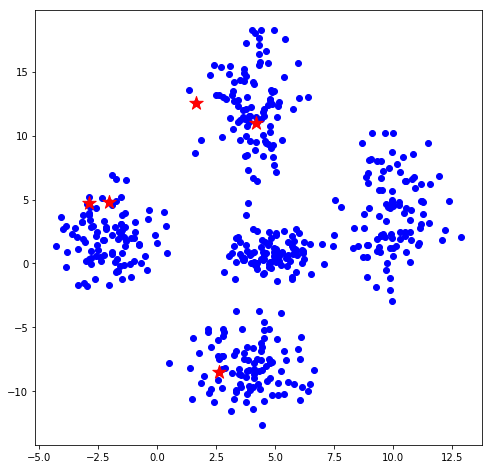

In [20]:
c=np.zeros((5,2))
for i in range(0,5):
    index=random.randint(0,len(x))
    c[i][0]=x[index]
    c[i][1]=y[index]
    print(c[i][0])
    print(c[i][1])
    
plt.figure(figsize=(8,8))
plt.scatter(x, y, color='b',linewidths=1)
plt.scatter(c[:,0], c[:,1], marker='*', s=200, c='r')
plt.show()

iteration :  1


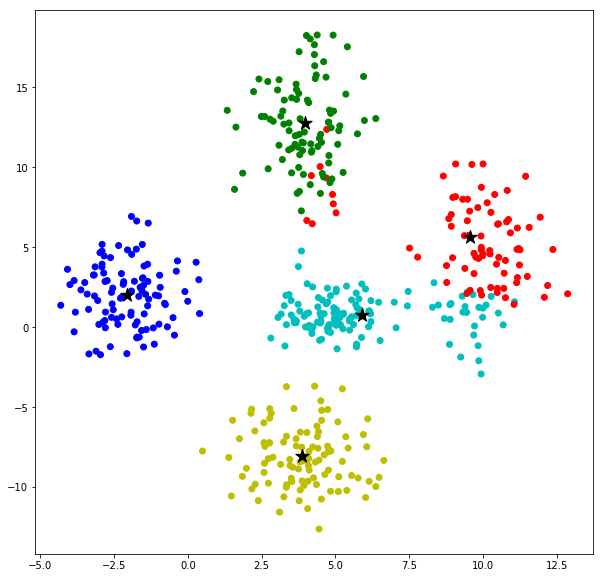

In [23]:
import math as m

cluster=np.full((len(x)), -2, dtype=int)
check=np.zeros((len(x)))
check2=np.full((len(x)), 1, dtype=int)

# check=np.zeros(5)
# check2=np.array([1,1,1,1,1])

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   2 : 'c',
                   3 : 'g',
                   4 : 'y'
                   }

stop=0
iteration=0

iteration+=1
for i in range(0,len(x)):
    min=99999999
    argmin=-1
    for j in range(0,5):
        tot = m.pow(x[i]-c[j][0],2) + m.pow(y[i]-c[j][1],2)
        dist=m.sqrt( tot )
          
        if min > dist:

            min=dist
            argmin=j
        
    if cluster[i]==argmin:
        check[i]=1
    else:
        check[i]=0
            
    cluster[i]=argmin


    mx=0
    my=0
    #find the mean and move the centroid
    count=1
    for k in range(0,i+1):
        if cluster[k]==cluster[i]:
            mx+=x[k]
            my+=y[k]
            count+=1

    mx+=c[int(cluster[i])][0]
    my+=c[int(cluster[i])][1]

    mx=mx/count
    my=my/count

    c[int(cluster[i])][0]=mx
    c[int(cluster[i])][1]=my
    
print("iteration : ",iteration)
label_color = [LABEL_COLOR_MAP[l] for l in cluster]
plt.figure(figsize=(10,10))
plt.scatter(x, y,linewidths=1, color=label_color)
plt.scatter(c[:,0], c[:,1], marker='*', s=200, c='k')
plt.show()
    
if(np.array_equal(check,check2)):
    stop=1    

In [159]:
a=np.full((5), -1, dtype=int)
a

array([-1, -1, -1, -1, -1])

In [ ]:
while(stop==0):
    iteration+=1
    for i in range(0,len(x)):
        min=99999999
        argmin=-1
        for j in range(0,5):
            tot = m.pow(x[i]-c[j][0],2) + m.pow(y[i]-c[j][1],2)
            dist=m.sqrt( tot )
          
            if min > dist:

                min=dist
                argmin=j
        
        if cluster[i]==argmin:
            check[i]=1
        else:
            check[i]=0
            
        cluster[i]=argmin


        mx=0
        my=0
        #find the mean and move the centroid
        count=1
        for k in range(0,i+1):
            if cluster[k]==cluster[i]:
                mx+=x[k]
                my+=y[k]
                count+=1

        mx+=c[int(cluster[i])][0]
        my+=c[int(cluster[i])][1]

        mx=mx/count
        my=my/count
    
    #Checking if the centroid still changes or not
#     if(c[int(cluster[i])][0]==mx and c[int(cluster[i])][1]==my):
#         check[int(cluster[i])]=1
        
    
    #---------
    
    c[int(cluster[i])][0]=mx
    c[int(cluster[i])][1]=my
    
    print("iteration : ",iteration)
    label_color = [LABEL_COLOR_MAP[l] for l in cluster]
    plt.figure(figsize=(10,10))
    plt.scatter(x, y,linewidths=1, color=label_color)
    plt.scatter(c[:,0], c[:,1], marker='*', s=200, c='k')
    plt.show()
    
    if(np.array_equal(check,check2)):
        stop=1